Consider the following experiment:

Experiment 1: Draw the first marble at random, place it back into the bag, then draw the second marble at random.

And suppose we defined the events:

Event A: the first marble is red.
Event B: the second marble is red
What is the probability of the event 
A
B
? The key observation is that by returning the first marble to the bag we are essentially returning the bag to its original state. So the probability of drawing a red marble on the second draw is exactly the same as on the first draw, which is 
3
/
7
 because there are a total of 7 marbles and 3 of them are red. Hence we can compute the probability of the event 
A
B
 as the product of the individual probabilities:

In [1]:
import random

In [2]:
bag = ['r','r','r','g','g','g','g']

In [3]:
random.randrange(len(bag))
# returns a random value between 0 and 7 (exculding 7)

1

In [4]:
color1 = bag[random.randrange(len(bag))]
color1

'g'

In [15]:
import random

bag = ['r','r','r','g','g','g','g']
experiments = 100000
counter = 0
for i in range(experiments):
    color1 = bag[random.randrange(len(bag))]
    color2 = bag[random.randrange(len(bag))]
    if color1=='r' and color2=='r':
        counter += 1

counter / experiments
#outputs a value close to the expected value of 3/7 * 3/7, e.g. 0.18367

0.18419

Experiment 2: Draw the first marble at random, do not place it back into the bag, then draw the second marble at random.

In [18]:
import random

bag = ['r','r','r','g','g','g','g']
experiments = 100000
counter = 0
for i in range(experiments):
    color1 = bag[random.randrange(len(bag))]
    # let's remove the marble from the bag
    bag.remove(color1)
    color2 = bag[random.randrange(len(bag))]
    if color1=='r' and color2=='r':
        counter += 1
    # let's put the first marble back for the next experiment!
    bag.append(color1)

counter / experiments
#outputs a value close to the expected value of, e.g. 0.1407

0.14286

#### Conditional probability
Conditional probability is about computing the probability of an event when there is some extra information, typically of the type that something else happened before. Extra information can change the outcome space of our event. Consider our previous example of the bag of marbles with 4 gray marbles and 3 red marbles where we are drawing the marbles without replacing (experiment 2).

Probabilité de B sachant A...


Puis calcul de l'espérance (Expectation)


In [20]:
## That was probably quite intuitive for you to solve. But if not, you can use the following python codes to tune your intuition. Let's first implement the experiment where you toss the coin three times, and would like to know how often tails comes up:

import random

import random

outcome_space = ['H','T']
experiments = 10000
tails = 0
for i in range(experiments):
    for toss in range(3):
        result = outcome_space[random.randrange(len(outcome_space))]
        if result=='T':
            tails += 1

tails / experiments
# a value very close to 1.5, e.g. 1.501

1.5095

Now let's toss a coin until heads comes up:

In [26]:
import random

outcome_space = ['H','T']
experiments = 10000
trials = 0
for i in range(experiments):
    seen_heads = False
    while not seen_heads:
        trials += 1
        result = outcome_space[random.randrange(len(outcome_space))]
        if result=='H': 
            break

trials / experiments

# a value very close to 2, e.g. 2.0059

1.9951

Linearity of expectation
One of the really nice things about expectation is that it has the property of linearity. For any random variables 
X
 and 
Y
 and constants 
c
1
,
c
2
 we have

E
(
c
1
X
+
c
2
Y
)
=
c
1
E
(
X
)
+
c
2
E
(
Y
)

In [41]:
import random

experiments = 10000
proper_hats = 0
men = list(range(50))
for i in range(experiments):
    hats = list(range(len(men)))
    for man in men:
        hat = hats[random.randrange(len(hats))]
        if man == hat:
            proper_hats += 1
        hats.remove(hat)

proper_hats / experiments
# output will be a value close to 1, e.g. 0.9866

1.003

#### Binomial Distribution

In [42]:
import random

experiments = 10000
experiments_k2 = 0
coinflips = 10
for i in range(experiments):
    heads = 0
    for flip in range(coinflips):
        if random.random() < 0.5:
            heads += 1
    if heads == 2:
        experiments_k2 += 1

experiments_k2 / experiments
# outputs a number close to 0.0439453125, e.g 0.0452


0.045

P
(
X
=
k
)
=
(
n
k
)
p
k
(
1
−
p
)
n
−
k

 In summary, a random variable 
X
 is binomially distributed with parameters 
n
 and 
p
 if


X is the number of success in n trials

each trial has a probability of success equal to P

the trials are independent

#### Uniform Distribution
Another type of discrete distribution that we have already seen is the uniform distribution that describes a random variable where every outcome is equally likely. For example, when we roll a dice, the possible outcomes are 
1
 to 
6
, and each of those happens with a probability of 
1
/
6
. 

In [52]:
import random

experiments = 10000
dices_value = 0
dice = list(range(1,7))
for i in range(experiments):
        value = dice[random.randrange(len(dice))]
        dices_value += value


dices_value / experiments



3.4885

For the example of our dice roll, this formula gives us an expected value of 
(
1
+
6
)
/
2
=
3.5
, meaning that if we repeat the dice roll enough times and take the average of the recorded outcomes, we would expect this to be near 
3.5
.

#### Geometric Distribution
The final type of distribution we will mention here is the geometric distribution. Let's look at the example of the coin toss, where we have a coin that shows heads with probability 
p
 for some parameter 
0
<
p
≤
1
. Now suppose we toss this coin as many times as necessary until we get our first head. Let 
X
 be the number of coin tosses up to and including the first success (a head). We can phrase this more generally as a series of independent trials, each of which has a probability 
p
 to succeed. How many trials 
X
 do we need to reach the first success?

#### Normal Distribution

A random variable 
X
 has the normal distribution with parameters mean 
μ
 and variance 
σ
2
 if it has the density function

f
(
x
)
=
1 /
√
2
π
σ
2
e
−
(
x
−
μ
)
2
2
σ
2
Now, this is a complicated formula to look at, but let's try to get some intuition about what the normal distribution really is. Perhaps the best way to do this is to take a visual look at the probability density functions. In the diagram below, we have two different examples of the probability density function with different expected values 
μ
 and standard deviation 
σ
.

In [54]:
from IPython.display import Image
Image(url= "https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3068/Screen_Shot_2017-10-19_at_15.25.45.png")

But what happens when we want to model data sets that are not necessarily "normal"? This is where the central limit theorem comes in. Roughly speaking, the central limit theorem tells us that if we have a sufficiently large number of randomly selected samples from a data set, the means of these samples will follow a normal distribution even if the data set itself that we are sampling is not normally distributed.

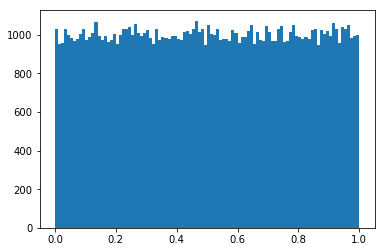

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np

# fill a list with 100,000 random numbers between 0 and 1
random_numbers = [random.random() for i in range(100000)] 
#plot to show that numbers are not normaly distributed
plt.hist(random_numbers,bins=np.linspace(0,1,101));


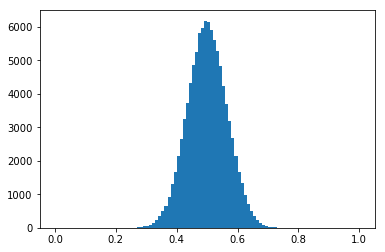

In [62]:
means = []
samplesize = 20
experiments = 100000
for i in range(experiments):
    total = 0
    for ii in range(samplesize):
        total += random.random()
    mean = total / samplesize
    means.append(mean)

plt.hist(means,bins=np.linspace(0,1,101));


QED! Indeed, the distribution of the means is a normal distribution, even though the original numbers come from a uniform distribution. That is exactly what the central limit theorem is saying.

### 08. Using statistical libraries

In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In Our case, we are interested in the uniform distribution, since each of the six outcomes is equally likely when throwing a dice. We can generate a set of uniformly distributed values using the stats.uniform.rvs()

In [65]:
uniform_data = stats.uniform.rvs(
    size=10000, # Number of points
    loc=1, # lower limit
    scale=6 # upper limit
).astype(int) # Make sure to get integer values

uniform_data

array([5, 1, 2, ..., 5, 2, 4])

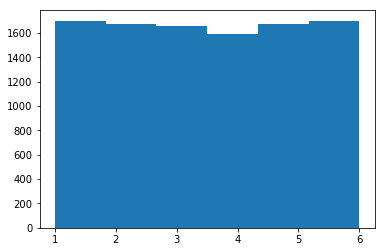

In [66]:
plt.hist(uniform_data, bins=6)
plt.show()

So we can see that as expected, we get about the same number of each outcome. Now suppose we wanted to study the average of every five die rolls. To do this, let's first define an array which holds the sums.

We can do this in many ways in Python, one of them is by using the np.add.reduceat function from Numpy which allows us to take running sums of successive values.

[   0    5   10 ... 9985 9990 9995]
2000
[18 19 18 ... 12 12 19]
2000


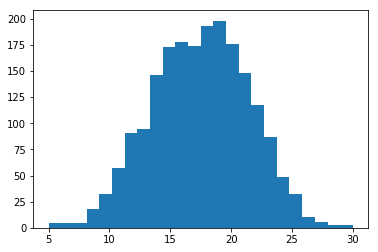

In [97]:
indexes = np.arange(0, 10000, 5)
print(indexes) # [0 5 10 ... 9985 9990 9995]
print(len(indexes)) # 2000

sums = np.add.reduceat(uniform_data, indexes)
print(sums) # [20 21 13 ... 21 15 10]
print(len(sums)) # 2000
plt.hist(sums,bins=np.linspace(5,30,25)); # afficher graph de distribution de la somme des 5 dés

In [96]:
np.mean(sums/5) # around 3.5

3.4978999999999996